# “The future belongs to those who learn more skills and combine them in creative ways.” 
#### – Robert Greene
### After the second big wave of procrastination has finally ended with a my third and final semester starting in jan I have finally decided to dedicate my winter holidays to started my journey for both to showcase & improve my skill and also job hunt. I have set a target of at least 2 codes per week and hope to learn a lot.

#### What better way than to start with the Titanic dataset


In [ ]:
# importing the required libraries
# working on Titanic Dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV, LassoLarsCV, LassoLarsIC, RANSACRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer

# importing the titanic dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dropping the unnecessary columns
data.drop(['alive','deck', 'embark_town'], axis=1, inplace=True)


# handling the missing values
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)


In [ ]:
data['sex'] = data['sex'].map({'male':0, 'female':1})
data['adult_male'] = data['adult_male'].map({True:0, False:1})
data['alone'] = data['alone'].map({True:0, False:1})
data['age_classes'] = data['age'].apply(lambda x: 0 if x < 15 else 1 if x < 30 else 2 if x < 45 else 3 if x < 60 else 4)
data.drop(['age'], axis=1, inplace=True)

In [ ]:
d = data.corr(numeric_only=True)
d = d.sort_values(by='survived', ascending=False, axis=1, na_position='last')
d.columns

Index(['survived', 'adult_male', 'sex', 'fare', 'alone', 'parch',
       'age_classes', 'sibsp', 'pclass'],
      dtype='object')

In [ ]:
d = d[['survived', 'adult_male', 'sex', 'fare', 'alone', 'parch',
       'age_classes', 'sibsp', 'pclass']]

<Axes: >

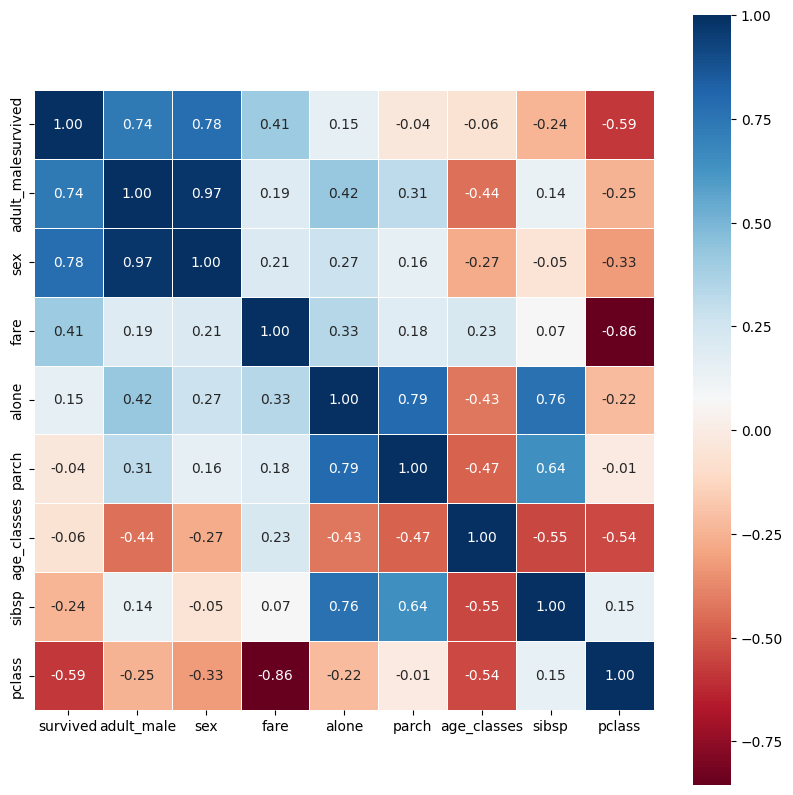

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(d.corr(numeric_only=True), cmap='RdBu', annot=True, linewidths=.5, fmt='.2f', annot_kws={'size': 10}, square=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    int64   
 10  alone        891 non-null    int64   
 11  age_classes  891 non-null    int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 77.7+ KB


In [ ]:
# one hot encoding 
data_num = data[['survived', 'adult_male', 'sex', 'fare', 'alone', 'parch',
       'age_classes', 'sibsp', 'pclass']]
data_cat = data[['class', 'embarked', 'who']]
data_cat = pd.get_dummies(data_cat)
data_cat = pd.DataFrame(data_cat)
data = pd.concat([data_num, data_cat], axis=1)

In [ ]:
X = data.drop(['survived'], axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   adult_male    891 non-null    int64  
 2   sex           891 non-null    int64  
 3   fare          891 non-null    float64
 4   alone         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   age_classes   891 non-null    int64  
 7   sibsp         891 non-null    int64  
 8   pclass        891 non-null    int64  
 9   class_First   891 non-null    bool   
 10  class_Second  891 non-null    bool   
 11  class_Third   891 non-null    bool   
 12  embarked_C    891 non-null    bool   
 13  embarked_Q    891 non-null    bool   
 14  embarked_S    891 non-null    bool   
 15  who_child     891 non-null    bool   
 16  who_man       891 non-null    bool   
 17  who_woman     891 non-null    bool   
dtypes: bool(9), float64(1), int64(

In [ ]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

62.36

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

94.38

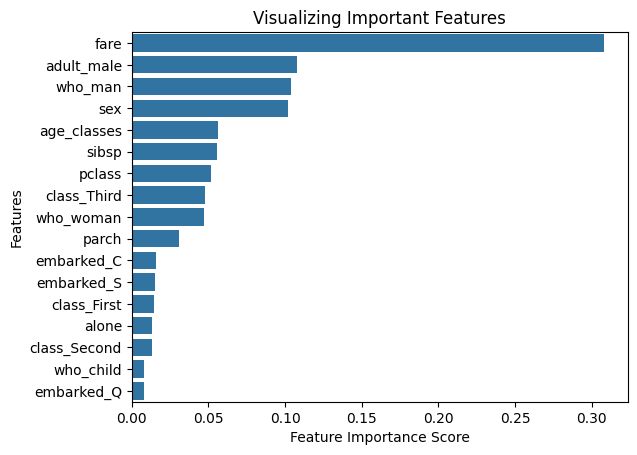

In [ ]:
# plotting random forest feature importance
feature_imp = pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show() 

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


83.01

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

86.52

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

Y_pred = gnb.predict(X_test)

acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)
acc_gnb

81.18

In [ ]:
# perceptron
Perceptron = Perceptron(max_iter=5)
Perceptron.fit(X_train, y_train)
Y_pred = Perceptron.predict(X_test)
acc_perc = round(Perceptron.score(X_train, y_train) * 100, 2)
acc_perc

c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


39.33

In [ ]:
# linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.49

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

94.38

In [ ]:
# best model 
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gnb, acc_perc,
              acc_sgd, acc_decision_tree]})

results = results.sort_values(by='Score', ascending=False)
results = results.set_index('Score')
results

,Model
Score,
94.38,Random Forest
94.38,Decision Tree
86.52,KNN
83.01,Logistic Regression
81.18,Naive Bayes
79.49,Support Vector Machines
62.36,Stochastic Gradient Decent
39.33,Perceptron


In [ ]:
impotances = pd.DataFrame({'feature': X_train.columns, 'importance': random_forest.feature_importances_})
impotances = impotances.sort_values('importance', ascending=False)
impotances

,feature,importance
2,fare,0.308005
0,adult_male,0.107492
15,who_man,0.104029
1,sex,0.101837
5,age_classes,0.056603
6,sibsp,0.055497
7,pclass,0.051788
10,class_Third,0.047741
16,who_woman,0.047427
4,parch,0.030863


In [ ]:
data.drop(['embarked_Q','who_child','class_Second','alone','embarked_C','class_First','embarked_S','parch'], axis=1, inplace=True)
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# hyper parameter tuning
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid =   { 'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15],
                'max_samples': [0.5, 0.75, 1.0],
                'max_features': [0.5, 0.75, 1.0],
                'bootstrap': [True, False],
                'oob_score': [True, False],
                'warm_start': [True, False],
                'n_jobs': [-1]
                }

# Create the grid search object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Print the best score
print("Best Score: ", grid_search.best_score_)


c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\srika\

Best Hyperparameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'warm_start': True}
Best Score:  0.8363096774193549


In [ ]:
y_pred = grid_search.predict(X_test)
acc_best_model = round(grid_search.score(X_train, y_train) * 100, 2)
acc_best_model

85.71

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(random_forest, X_train, y_train, cv=5)

array([0.784     , 0.856     , 0.736     , 0.80645161, 0.82258065])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[146,  11],
       [ 36,  75]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

0.872093023255814

In [ ]:

recall_score(y_test, y_pred)

0.6756756756756757

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7614213197969543

In [ ]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       157
           1       0.87      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



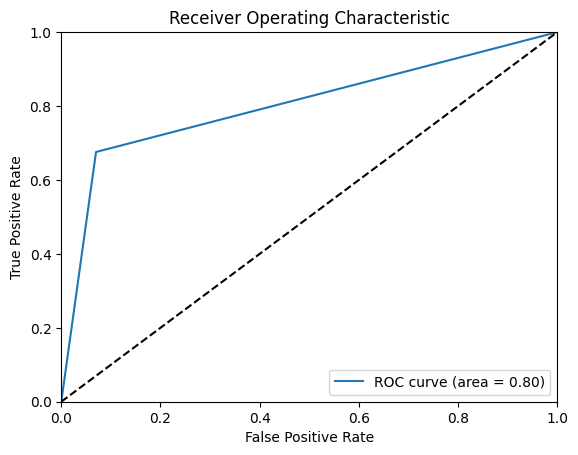

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()